### What is statistics?

<ul>
    <li>The field of statistics - the practice and study of collecting and analyzing data.</li>
    <li>A summary statistic - a fact about or summary of some data.</li>
</ul>

<b>Measures of Centre</b>
 <ul>
    <li>Mean</li>
    <li>Median</li>
    <li>Mode</li>
</ul>

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading dataset to dataframe
df = pd.read_csv('dataset/food_consumption.csv')

In [3]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [4]:
df.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


In [5]:
#Mean
mean_ = np.mean(df['consumption'])
print(mean_)

28.110405594405623


In [6]:
#Median
median_ = np.median(df['consumption'].sort_values())
print(median_)

8.89


In [ ]:
#Mode
import statistics
mode_ = statistics.mode(df['foo'])

In [7]:
#Subsetting for India and USA
ind_consumption = df[df['country'] == 'India']
usa_consumption = df[df['country'] == 'USA']

In [8]:
# Calculate mean and median consumption in India
print('Mean:',np.mean(ind_consumption['consumption']))
print('Median:',np.median(ind_consumption['consumption']))

Mean: 20.699999999999996
Median: 1.92


In [9]:
ind_consumption['consumption'].describe()

count    11.000000
mean     20.700000
std      33.106673
min       0.280000
25%       0.695000
50%       1.920000
75%      32.635000
max      84.500000
Name: consumption, dtype: float64

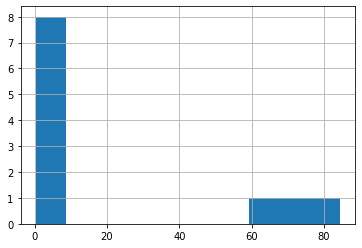

In [10]:
ind_consumption['consumption'].hist()
plt.show()

In [11]:
ind_consumption.groupby('food_category')['consumption'].sum()

food_category
beef          0.81
dairy        84.50
eggs          2.58
fish          4.71
lamb_goat     0.58
nuts          1.92
pork          0.28
poultry       1.88
rice         69.49
soybeans      0.39
wheat        60.56
Name: consumption, dtype: float64

In [12]:
# Calculate mean and median consumption in USA
print('Mean:',np.mean(usa_consumption['consumption']))
print('Median:',np.median(usa_consumption['consumption']))

Mean: 44.650000000000006
Median: 14.58


In [13]:
usa_consumption['consumption'].describe()

count     11.000000
mean      44.650000
std       73.796233
min        0.040000
25%        7.370000
50%       14.580000
75%       43.125000
max      254.690000
Name: consumption, dtype: float64

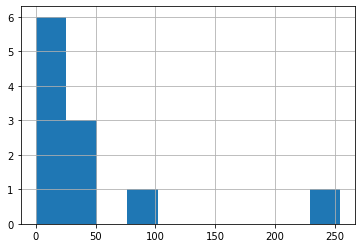

In [14]:
usa_consumption['consumption'].hist()
plt.show()

In [15]:
usa_consumption.groupby('food_category')['consumption'].sum()

food_category
beef          36.24
dairy        254.69
eggs          14.58
fish          12.35
lamb_goat      0.43
nuts           7.86
pork          27.64
poultry       50.01
rice           6.88
soybeans       0.04
wheat         80.43
Name: consumption, dtype: float64

<p><b>Which measure to use?</b>
<br/>
Since the mean is more sensitive to extreme values, it works better for symmetrical data. However, if the data is skewed, meaning it's not symmetrical, like above plots, median is usually better to use. When data is skewed, the mean and median are different. The mean is pulled in the direction of the skew, so it's lower than the median on the <b>left-skewed data</b>, and higher than the median on the <b>right-skewed data</b>. Because the mean is pulled around by the extreme values, it's better to use the median since it's less affected by outliers.
</p>
<hr></hr>

<b>Measures of Spread</b>
<p>Spread is just what it sounds like - it describes how spread apart or close together the data points are. Just like measures of center, there are a few different measures of spread.</p>
<ul>
    <li>Variance</li>
    <li>Standard Deviation</li>
</ul>

In [16]:
df.describe()

,consumption,co2_emission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [18]:
#Variance for consumption and co2_emission
print('consumption Variance: ', np.var(df['consumption']))
print('co2_emission Variance: ', np.var(df['co2_emission']))

consumption Variance:  2480.1020030522786
co2_emission Variance:  23117.796034615305


In [19]:
#Standard Deviation(STD) for consumption and co2_emission
print('Consumption STD: ', np.std(df['consumption']))
print('CO2_emission STD: ', np.std(df['co2_emission']))

Consumption STD:  49.80062251671437
CO2_emission STD:  152.04537492017081


In [30]:
from scipy.stats import iqr #IQR = Height of the box in a boxplot

In [23]:
iqr_consum = iqr(df['consumption']) 
print(iqr_consum)

25.7675


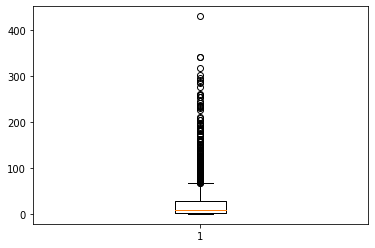

In [29]:
plt.boxplot(df['consumption']) 
plt.show()

<p><b>Outlier: data point that is substantially different from the others</b><p>
<p>How do we know what a substantial difference is? A data point is an outlier if:</p>
data < Q1 − 1.5 × IQR or
<br/>
data > Q3 + 1.5 × IQR

In [25]:
iqr_co2 = iqr(df['co2_emission'])
lower_thresh = np.quantile(df['co2_emission'], 0.25) - 1.5 * iqr_co2
upper_thresh = np.quantile(df['co2_emission'], 0.75) + 1.5 * iqr_co2

In [26]:
df[(df['co2_emission'] < lower_thresh) | (df['co2_emission'] > upper_thresh)]

,country,food_category,consumption,co2_emission
2,Argentina,beef,55.48,1712.00
6,Argentina,dairy,195.08,277.87
13,Australia,beef,33.86,1044.85
14,Australia,lamb_goat,9.87,345.65
17,Australia,dairy,234.49,334.01
...,...,...,...,...
1295,Philippines,rice,119.44,152.85
1366,Cambodia,beef,4.85,149.66
1372,Cambodia,rice,159.10,203.60
1405,Indonesia,rice,134.62,172.27


In [27]:
df.shape

(1430, 4)

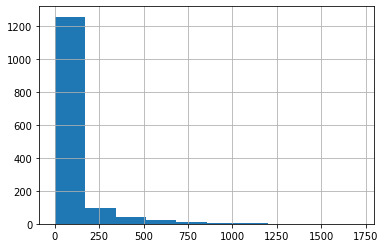

In [28]:
df['co2_emission'].hist()
plt.show()